# Utility Functions and Imports

In [ ]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
def plotEpisodeRews(allRews, windowSize):
    """
     * Utility function. Creates two plots of rewards over episodes 
     * for all three agents. The left graph is a simple plot of the 
     * rewards. The right graph shows the same plot of rewards smoothed
     * using a rolling average of the given window size.
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 4))

    ax1.set_xlabel("Episode Number")
    ax1.set_ylabel("Total Episode Reward (No Smoothing)")
    ax1.set_title("Total Episode Rewards (No Smoothing)")

    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Episode Reward (Smoothed)")
    ax2.set_title("Total Episode Rewards (Smoothed. Window size: {})".format(
                                                                    windowSize))

    labels = ["Random Agent", "Deterministic Agent", "Q Learning Agent"]

    for rews, label in zip(allRews, labels):
        ax1.plot(rews, label = label)
        
    #Smooth rewards using rolling average over given window size
    smoothRews = [pd.Series(rews).rolling(windowSize, min_periods = 
                                         windowSize).mean() for rews in allRews]

    for rew, label in zip(smoothRews, labels):
        ax2.plot(rew, label = label)
    
    ax1.legend()
    ax2.legend()
    ax1.grid(True)
    ax2.grid(True)

    plt.show()

In [ ]:
def plotStateReward(s, r):
    """
     * Simple utility function for creating two plots, the
     * states against the time on the leftsubplot and the
     * reward against the time on the right subplot.
    """
    
    fig, axes = plt.subplots(1, 2, figsize = (20, 8))

    labels = [
        's[0]: susceptibles',
        's[1]: infectious',
        's[2]: quarantined',
        's[3]: recovereds'
    ]

    s = np.array(s)

    # plot state evolution on the left subplot
    for i in range(4):
        axes[0].plot(s[:, i], label = labels[i]);

    axes[0].set_title('State')
    axes[0].set_xlabel('Weeks since start of epidemic')
    axes[0].set_ylabel('State s(t)')
    axes[0].legend()

    # plot reward evolution on the right subplot
    axes[1].plot(r);
    axes[1].set_title('Reward')
    axes[1].set_xlabel('Weeks since start of epidemic')
    axes[1].set_ylabel('Reward r(t)')

    print('Total reward for this episode is ', np.sum(r))

    axes[1].set_ylim(-.6, 0)
    plt.show()

In [ ]:
def plotStateRewardMulti(sList, rList):
    """
     * Utility for plotting state and reward evolutions of all agents,
     * Creates 4 plots where:
     *  - The first three plots are the state evolutions of all three agents
     *  - The final plot is the rewards of all three agents
     *
     * The sList and rList must be of the format [random, deterministic, QAgent]
    """
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 4))

    stateAxes = [ax1, ax2, ax3]

    labels = ["Susceptible", "Infectious", "In Quarantine", "Recovered"]
    titles = ["Random", "Deterministic", "Q Learning"]

    for ax, states, title in zip(stateAxes, sList, titles):
        states = np.array(states)

        ax.set_title("States (" + title + ")")
        ax.set_xlabel("Weeks Since the Start")
        ax.set_ylabel("State")

        for i in range(4):
            ax.plot(states[:, i], label = labels[i])

        ax.legend()
    

    for rews, title in zip(rList, titles):
        print(title + " total reward: " + str(np.sum(rews)))

        ax4.set_title("All Agents Episode Rewards")
        ax4.set_xlabel("Weeks Since the Start")
        ax4.set_ylabel("Reward")
        ax4.plot(rews, label = title)

    ax4.legend()
    plt.show()

In [ ]:
def plotRews(rList):
    """
     * Utility function for plotting the rewards of multiple agents
    """
    
    fig, ax = plt.subplots(1, 1, figsize = (4, 4))

    titles = ["Random", "Deterministic", "Q Learning"]
    
    for rews, title in zip(rList, titles):
        print(title + " total reward: " + str(np.sum(rews)))

        ax.set_title("All Agents Episode Rewards")
        ax.set_xlabel("Weeks Since the Start")
        ax.set_ylabel("Reward")
        ax.plot(rews, label = title)

    ax.legend()
    
    plt.show()

## Reinforcement Learning: Virus Mitigation Strategies

Jake Haakanson - 2407682H

University of Glasgow


## Abstract

Governments around the world have been faced with the task of implementing measures to mitigate the risks posed by emerging viruses such as COVID-19. The following explores the ways in which artificial intelligence may be employed to better implement these restrictive measures through reinforcement learning, a technique in which an intelligent agent exlpores an environment over many simulations in order to determine the best course of action.

In [ ]:
# Obtain the notebook JSON as a string
from google.colab import _message
notebook_json = _message.blocking_request('get_ipynb', request='', timeout_sec=5)

# collate all text in Markdown cells
all_text = ''
for cell in notebook_json['ipynb']['cells']:
    if cell['cell_type'] == "markdown":
        all_text += ' '.join(cell['source'])
# replace # and \n by empty space
all_text = all_text.replace('#', '').replace('\n', '')
# find main section and reference & appendix section
before_eof, eof, after_eof = all_text.partition('===EOF===') # please do not temper with this

# count words per section, our counting method is simple and probably plays in your favor
report_word_count = len(before_eof.split())
remaining_word_count = len(after_eof.split())

print("Your report currently has {} words".format(report_word_count))
print("Your reference and appendix currently have {} words".format(remaining_word_count))

# Please respect this convention and work with it, not against it.
# We will run an independant word count check on all notebooks submitted

TypeError: ignored

# 1. Introduction

## 1.1 Motivation

In the context of a global pandemic governments require an implementable policy in order to mitigate the spread of the disease. A recent global pandemic is the COVID-19 virus and gives justification for the following experiments. Governments have attempted to implement several different non-medical strategies in order to mitigate the spread of the virus, the most notable of which are as follows:

* **Implementing track and trace systems** where people's details are collected in order to later contact them if they have been exposed to the virus

* **Imposing a full lockdown** where people are required to stay inside their homes and away from outsiders

* **Wearing face coverings and social distancing** where governments expect individuals to wear protective face coverings, such as surgical masks, and to remain a safe distance away from others

## 1.2 Task Environment
In this notebook we make use of the pandemic simulator "ViRL" [5], an environment for training reinforcement learning agents to mitigate the effects of pandemics.

In [ ]:
!git clone https://git.dcs.gla.ac.uk/SebastianStein/virl.git
sys.path.append('virl')

import virl

Cloning into 'virl'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (55/55), done.


The ViRL simulator simulates an environment with roughly 100 million individuals. Individuals may fall into the following four categories:
* Susceptibles: those that have not been exposed to the virus
* Infectious: people who have been exposed to the virus and have not yet recovered
* Quarantined: people who are isolating away from others
* Recovereds: People who have been infectious, but have recovered

The environment operates over the space of 52 weeks, where each week an agent may view the numbers of people in each of the above categories and choose to proceed using one of the following actions:
* Do nothing
* Full lockdown: people will be required to stay in their homes away from others
* Use a track and trace system as described in section 1.1
* Social distancing and masks as described in section 1.1

Each of these actions will impact the spread of the virus differently. With each passing week the agent will be able to see how the action taken in the previous week impacted the numbers of people in each category, and the agent will receive a corresponding reward which it can use to inform its future decisions.

## 1.3 PEAS Analysis
In a PEAS analysis we assess different aspects of the agent and the environment in order to determine things such as metrics. The PEAS analysis is shown below:

* **Performance Measure**: The performance measure is a function of the number of people in each of the above categories and the action taken by the agent

* **Environment**: The agent's environment is some space containing roughly 100 million individuals. Each of these individuals fall into one or more of the previously described categories

* **Actions**: Actions the agent is able to perform include putting a full lockdown into place, implementing a track and trace system, enforcing social distancing and masks, or doing nothing at all.

* **Sensors**: At each time step the agent's "sensors" provide it with the numbers of people in each of the pre-defined categories, such as infecteds or recoverds.


# 2. Method and Implementation

In this section the following three different agents are implemente:
* Random Agent: an agent which ignores all states and rewards and takes actions at random
* Deterministic Agent: an agent that monitors the states in order to inform its actions based on a pre-defined policy
* Q-Learning Agent with RBF Function Approximation: an agent that develops an appropriate policy through exploring and learning from the environment

## 2.1 Random Agent

Below is a random agent. When run, this agent will select a random action out of all available actions using numpy's random number generator. The agent pays no attention to the current state of the world or the rewards it receives.

In [ ]:
import random


class RandomAgent():
    def __init__(self):
        self.nActions = 4 #Num of actions to choose from


    def chooseAction(self):
        """Selects an action at random from available actions"""
        return random.randrange(self.nActions)


    def run(self, id, stochastic = False, noisy = False):
        """Executes a series of random actions in the agent's environment"""
        runEnv = virl.Epidemic(  #Environment for random agent
            stochastic = stochastic,
            noisy      = noisy,
            problem_id = id
        )

        currState = runEnv.reset()    #Reset environment

        states  = [currState]   #Store starting state
        rewards = []           #No reward for starting
        actions = []            #Store all actions

        done = False

        while not done:
            bestAction = self.chooseAction()    #Select action (random)

            currState, currRew, done, info = runEnv.step(action = bestAction)
                                        
            states.append(currState)   #Store state reached
            rewards.append(currRew)    #Store reward received
            actions.append(bestAction)

        return states, rewards, actions

## 2.2 Deterministic Agent
The deterministic agent uses a predefined policy in order to carry out actions each week. The action taken depends on the current state observation as described below:

* **Full Lockdown:** If over 150,000 people are infected the agent will impose a full lockdown

* **Social Distancing and Masks:** If over 50,000 people currently in quarantine the agent will enforce the use of face masks and social distancing

* **No Intervention:** Only if a very large number of people are no longer susceptible, roughly just over a quarter of the total population, will the agent not intervene

* **Track and Trace:** The agent "defaults" to having track and trace in place, in that if none of the above criteria are satisfied then track and trace will be implemented.

This policy is pre-defined manually and is likely sub-optimal. To further this, the agent makes absolutely no use of the rewards it receives and simply opts to view the current state of the world at the beginning of each week and use this to inform its next decision.

In [ ]:
class DeterministicAgent():
    def __init__(self):
        self.nActions = 4


    def chooseAction(self, state):
        """
         * Select an action based on the following observations:
         *  - state[0]: Number of susceptibles
         *  - state[1]: Number of infecteds
         *  - state[2]: Number of people in quarantine
         *  - state[3]: Number of recovereds
        """

        if state[1] > 150000:       #High amount of people infected
            return 1                #Enforce a full lockdown
        
        elif state[2] > 50000:      #High amount of people in quarantine
            return 3                #Enforce social distancing and masks
        
        elif state[0] < 30000000:   #Low amount of people susceptible
            return 0                #Do nothing
        
        return 2                    #Implement track and trace by default


    def run(self, id, stochastic = False, noisy = False):
        """
         * Executes a series of actions based on the observations in the current
         * state. These observations and the corresponding actions are described
         * in the chooseAction function above.
        """
        runEnv      = virl.Epidemic(  #Environment for deterministic agent
            stochastic = stochastic,
            noisy      = noisy,
            problem_id = id
        )

        currState = runEnv.reset()    #Reset environment

        states  = [currState]   #Store start state
        rewards = []           #No reward for start
        actions = []            #Store all actions taken by agent

        done = False

        while not done:
            bestAction = self.chooseAction(currState)    #Select action

            currState, currRew, done, info = runEnv.step(action = bestAction)

            states.append(currState)   #Store state reached
            rewards.append(currRew)    #Store reward received
            actions.append(bestAction)
        
        return states, rewards, actions

## 2.3 Q-Learning with Function Approximation

In this section a Q-learning agent is implemented using an RBF function approximation (See FTransformer class for details). The agent operates assuming that the environment is Markovian allowing it to learn from transitions and rewards through the Bellman equation and temporal difference (TD) learning. During learning, the weights of the network are adjusted using stochastic gradient descent (SGD) and temporal difference targets using samples from a replay buffer so as not to overfit. Each of these aspects is discussed in the following.

### 2.3.1 Markovian Environment

The agent assumes the Markov property of state transitions. The Markov property [3] is the assumption that the probability a future state $S'$ is independent of all past states given the present state $S$. More compactly this can be written as $P(S'|S)$.

It is also assumed that the environment can be modelled by a Markov Decision Process (MDP). This is the inclusion of control in the form of some action $A$ in the transition, resulting in a new transition model $P(S'|S,A)$ [4]. The MDP also includes a reward function $R(S)$ defined by the Bellman equation that allows the agent to calculate a TD learning target value.

In the simulation, the agent knows its current state, $S$, and after taking an action, $A$, the environment will inform the agent of the resulting state $S'$ and the reward $R(S)$.

### 2.3.2 Bellman Equation and Temporal Difference Learning
Given some policy, $\pi$, the Bellman equation [6] allows us to recursively calculate the utility of a given state $S$ based on the following equation:
$U^{\pi}(S)=R(S)+\gamma\cdot(\sum_{S'}P(S'|S,A=\pi(S))U^{\pi}(S'))$

Here $U^{\pi}(x)$ represents the current utility of some state $x$, $R(x)$ returns the scalar reward for being in state $x$, and $\pi(x)$ will recommend one action for the state x. To elaborate, we calculate the value of $U^{\pi}(S)$ to be the reward for being in state $S$ plus the discount of all future rewards. The discount is represented by $\gamma \leq 1$ which we multiply the future rewards by in order to exaggerate or discourage more immediate rewards.

This approach seems more appropriate in environments with a smaller state space, however it allows us to implement a technique known as TD learning. Given that we have already observed the transition $P(S'|S,A=\pi(S))=1$, and therefore the above equation becomes $U^{\pi}(S)=R(S)+\gamma\cdot U^{\pi}(S')$. We may calculate this equation with the existing policy at a given time step, meaning we may observe a case in which the equation is not true. In this instance $R(S)+\gamma\cdot U^{\pi}(S')$ becomes what is known as a TD target value, and we may modify our policy $U^{\pi}(S)$ accordingly to fit this target value.

In the Q-agent the policy is represented by four sklearn SGDRegressor [7] models, each one representing an action that the agent may take. Predicting a state with one of these models will return the Q-value, or estimated utility, of taking the action represented by the model in the given state. We can use these models to retrieve the Q-Value of taking a specific action in a given state, or retrieve the maximum returned value out of all four model's Q-values for a state.

After carrying out an action, the environment provides the agent with the resulting state, $S'$, and the reward $R(S)$. Using these values we may calculate the right-hand side of the TD equation, in turn calculating a TD target value. This allows the SGDRegressor to adjust its coefficients accordingly such that the TD equation is more aproximately true.


### 2.3.3 SGD and Learning Q-Values
The agent maintains a sklearn SGDRegressor estimator for each action available. Given a state, each estimator will return the Q-value for taking the action that it represents in that state. The agent learns these Q-values by developing a function approximation through repeated trials of the simulation. Each time the agent reaches a state, it consults the models in order to determine which action is optimal according to the Q-values returned.

During learning, the agent will calculate a TD target value as described previously. The corresponding model representing the action taken in the state transition will then have its coefficients for the initial state updated based on this TD target value. This allows the model to more accurately approximate the utility of a state S by updating the coefficients such that $R(S)+\gamma\cdot U^{\pi}(S')$ is more approximately equal to $U^{\pi}(S)$.

### 2.3.4 Replay Buffer
The sequential nature of training may lead to overfitting, causing the agent to be ineffective. An attempt to mitigate this negative effect is known as a replay buffer. A replay buffer [2] stores a specified amount of transitions that the agent has experienced. We are able to calculate the TD targets of these transitions at any time. Taking random samples from the replay buffer allows the agent to update coefficients with less of a risk of overfitting as the sequential nature has been removed. This is known as batch learning.

The agent makes use of a very simple replay buffer. The buffer itself is represented by a python deque object [8], a simple generalised, double-ended queue. When enough transitions are present in the deque samples will be taken and the agent will update the models representing the action of each transition based on the TD target value calculated from the transition.

### 2.3.5 Exploration vs Exploitation
Exploration refers to the agent's ability to select sub-optimal actions in order to gain knowledge about the environment. Exploration is an important part of reinforcement learning, as without exploration the agent will not realistically converge to a near-optimal solution. There is a trade-off, however, between exploration and explotation, the agent's ability to exploit what it knows about the environment in order to maximise rewards.

In the agent, the exploration factor is represented by a value, $\epsilon$. This describes the extent to which the agent will explore, and is decayed by some factor throughout training in order for the agent to rely more on exploitation of knowledge gained in order to improve rewards.

In [ ]:
from collections import deque
from sklearn.linear_model import SGDRegressor


class QAgentRBF():
    def __init__(self, eps = 1.0, epsMin = 0.001, epsDecay = 0.99, dFactor = 0.75, batchSize = 52):
        """
         * Q-Learning Agent using RBF function approximation with sklearn's RBFSampler
         *
         * Inputs:
         *  - eps:      Exploration rate, or probability of taking a random action
         *  - epsMin:   Minimum exploration rate
         *  - epsDecay: Factor to decay exploration rate by
         *
         *  - dFactor: Factor to discount future rewards by
         *
         *  - batchSize: Size of batches of sampels to fit SGDRegressor with
        """

        self.numActions = 4   #Num actions in each state

        self.replayBuffer   = deque(    #Agent memory as a deque
            maxlen = 13000       #Remember 250 episode transitions
        )

        self.eps      = eps       #Exploration rate (prob of random action)
        self.epsMin   = epsMin    #Minimum exploration rate
        self.epsDecay = epsDecay  #Factor to decay exploration rate by

        self.discountFactor = dFactor  #Factor to discount future rewards by

        self.batchSize = batchSize  #Batch size for learning

        #Feature transformer, see class below for details
        self.featureTransformer = FTransformer()

        #One model for each action
        self.models = [
            SGDRegressor(
                loss          = "squared_error",
                alpha         = 0.0001,
                learning_rate = "invscaling",
                eta0          = 0.9,
                warm_start    = True
            )
            for _ in range(4)
        ]

        self.modelCoefs = None


    def _predict(self, state, action = None):
        """
         * Predict rewards of current state in the form of Q-Values based on
         * the current model. If an action is supplied it will only predict
         * based on the supplied action.
         *
         * Inputs:
         *  - state:  State to predict QValues for
         *  - action: Action to predict QValue for if specified
        """
        features = self.featureTransformer.transform(state)

        if action is None:
            return np.array([   #Get Q-Value for each action
                model.predict([features])[0] for model in self.models
            ])
        
        return self.models[a].predict([features])[0]


    def addToMem(self, prevState, action, nextState, reward, isTerm):
        """
         * Add a state transition to the agent's memory for later replay
         *
         * Inputs:
         *  - prevState: The state the agent was in
         *  - action:    The action the agent took
         *  - nextState: The state the agent ended up in
         *  - rew:       The reward received for the transition
         *  - isTerm:    Whether or not the agent ended up in a terminal state
        """
        self.replayBuffer.append((prevState, action, nextState, reward, isTerm))
    

    def replay(self):
        """
         * Use replay buffer to "learn" from randomly
         * sampled (with replacement) memories
        """
        batch = random.sample(  #Get batch from mem of batchSize
            self.replayBuffer,
            self.batchSize
        )

        for prevState, action, nextState, reward, isTerminal in batch:
            self.learnFrom(prevState, action, nextState, reward, isTerminal)
        
        #Update epislon
        if self.eps > self.epsMin:
            self.eps *= self.epsDecay


    def learnFrom(self, prevState, action, nextState, rew, isTerm):
        """
         * Update the model given a single transition
         *
         * Inputs:
         *  - prevState: The state the agent was in
         *  - action:    The action the agent took
         *  - nextState: The state the agent ended up in
         *  - rew:       The reward received for the transition
         *  - isTerm:    Whether or not the agent ended up in a terminal state
        """
        target = (rew + (               #Target is reward plus
                self.discountFactor *   #Discount of future rewards
                np.amax(self._predict(nextState)[0]) *
                isTerm                  #Provided the state is not terminal
            )
        )

        self.models[action].partial_fit(   #Update the model with the transition
            [self.featureTransformer.transform(prevState)],
            [target]
        )


    def chooseAction(self, state):
        """
         * Choose the "best" action based on Q-values
         * with exploration factor influence.
         *
         * Inputs:
         *  - state:  The state the agent is current in
         *  - policy: The current policy
         *
         * Outputs:
         *  - The optimal action in the given state based on the Q-Values
        """

        """actionProbs, QValues = policy(
            state   #Get action probabilities and Q values using current policy
        )

        bestAction = np.random.choice(  #Get "best" action using probs
            np.arange(self.numActions),
            p = actionProbs #Exploration factor (probability of random action)
        )

        return bestAction"""

        if np.random.rand() <= self.eps:
            return random.randrange(4)

        return np.argmax(self._predict(state))


    def train(self, ID, stochastic = False, noisy = False, numEpisodes = 200):
        """
         * Train the agent on numEpisodes episodes
         *
         * Inputs:
         *  - ID:         The problem ID for environment
         *  - stochastic: Whether or not the environment is stochastic
         *  - noisy:      Whether or not the environment is noisy
         *
         *  - numEpisodes: Number of episodes to train the agent over
         *  - batchReplay: Whether or not to use batch replay buffer learning
         *
         * Outputs:
         *  - states:  List of lists of states encountered in each episode
         *  - rewards: List of lists of rewards received during each episode
        """

        trainEnv = virl.Epidemic(   #Create training env for agent
            noisy = noisy,
            problem_id = ID,
            stochastic = stochastic
        )

        self.featureTransformer.fit(    #Fit feature transformer to observations
            np.array([
                trainEnv.observation_space.sample() for _ in range(15000)
            ])
        )

        for model in self.models:   #Fit models to starting states
            model.partial_fit(
                [self.featureTransformer.transform(trainEnv.reset())], [0]
            )

        self.numActions = trainEnv.action_space.n

        bestRew = -2    #Stores best reward so far

        states, rewards = [], []    #Stores all states and rewards

        originalDiscount = self.discountFactor  #Store original discount factor

        for episodeNum in range(numEpisodes):
            prevState = trainEnv.reset()    #Reset env

            states.append([prevState])
            rewards.append([])

            done = False
            totalRew = 0

            dFactorDecay = 1

            while not done: #Carry out episode over 52 weeks in simulation
                bestAction = self.chooseAction(prevState)

                nextState, reward, done, envInfo = trainEnv.step(
                                      action = bestAction)   #Take "best" action

                states[episodeNum].append(nextState)
                rewards[episodeNum].append(reward)

                totalRew += reward

                if done:    #"Memorise" transition for later learning
                    self.addToMem(prevState, bestAction, nextState, reward, 0.0)
                
                else:
                    self.addToMem(prevState, bestAction, nextState, reward, 1.0)
                    
                if len(self.replayBuffer) > self.batchSize: #Learn from replay buffer
                    self.replay()

                prevState = nextState
                
            if (totalRew > bestRew):    #Save best reward so far
                bestRew = totalRew

                print("\rEpisode: {}/{}, score: {}, epsilon: {:.2}".format(episodeNum, numEpisodes, totalRew, self.eps))

            #self.discountFactor = originalDiscount

        return states, rewards
    
    
    def run(self, ID, stochastic = False, noisy = False):
        """
         * Run the agent on the environment with the input parameters
         * uses the best-performing model's coefficients.
         *
         * Inputs:
         *  - ID:         Problem ID for the environment
         *  - stochastic: Whether or not the env should be stochastic
         *  - noisy:      Whether or not the env should be noisy
         *
         * Outputs:
         *  - states:  All states the agent encounters during execution
         *  - rewards: All rewards received for taking actions during execution
         *  - actions: All actions taken by the agent during execution
        """

        states  = []    #Store list of states encountered
        rewards = []   #Store list of rewards received
        actions = []    #Store list of actions taken

        runEnv = virl.Epidemic( #Create env for running the agent
            stochastic = stochastic,    #Use input params
            noisy      = noisy,
            problem_id = ID
        )

        state = runEnv.reset()  #Reset env
        states.append(state)    #Log initial state

        done = False

        oldEps = self.eps   #Set self.eps aside for running without learning
        self.eps = 0

        while not done:
            bestAction = self.chooseAction(state)

            actions.append(bestAction)  #Log action

            state, reward, done, envInfo = runEnv.step(
                                       action = bestAction)    #Carry out action

            states.append(state)    #Log state
            rewards.append(reward)  #Log reward
        
        self.eps = oldEps   #Reset eps after running agent

        return states, rewards, actions

### 2.3.6 RBF Function Approximation
We are able to combine several of the earlier mentioned RBFSamplers in order to form a process by which we can transform features of states, for example the below feature transformer alters a state consisting of 4 features into a state represented by 400 features. I believe that this process allows the agent to transform potentially unseen states in such a way that it is able to develop approximations for how to proceed.

### 2.3.7 Scaling States
States are represented by the number of individuals in each of the defined categories. Due to the large number of individuals in the simulation it is helpful to scale the data using sklearn's StandardScaler. To further this, many sklearn libraries which the agent employs operate more effectively on scaled data. Sklearn's StandardScaler is a type of preprocessing estimator which removes the mean of any given data and scales the data to unit variance [1].

The agent also fits the feature transformer and standard scaler to a large number of samples from ViRL's observation space. As the magnitude of these samples relatively small (sample values roughly between 0 and 10), we must normalise the state data in order for the tranformations to be applied in a meaninful way. This is carried out using sklearn's normalize function [1].

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import normalize as normalise


class FTransformer():
    """
     * Feature transformer class
     * Transforms states consisting of 4 features into states consisting
     * of 400 features using RBF function approximation
    """
    def __init__(self):
        #Feature transformer consisting of four RBFSamplers
        #Each RBFSampler has a different gamma value and 100 components
        self.featureTransformer = FeatureUnion([
            ("RBF1", RBFSampler(gamma = 5.0, n_components = 100)),
            ("RBF2", RBFSampler(gamma = 2.0, n_components = 100)),
            ("RBF3", RBFSampler(gamma = 1.0, n_components = 100)),
            ("RBF4", RBFSampler(gamma = 0.5, n_components = 100))
        ])

        #Scaler to normalise data. Removes mean and scales to unit variance
        self.standardScaler = StandardScaler()


    def transform(self, state):
        """
         * Transforms a single state using the transformer
         *  - 1: Normalises the state
         *  - 2: Removes mean, scales to unit variance
         *  - 3: Transforms using feature transformer
        """
        return(
            self.featureTransformer.transform(  #3
                self.standardScaler.transform(  #2
                    #Hack (add and remove dimension) to work
                    [np.squeeze(normalise(state[:, None], axis = 0))]   #1
                )
            )
        )[0]


    def fit(self, observations):
        """
         * Normalise observations, fit standard scaler to normalised
         * observations. Remove mean and scale to unit variance, then 
         * fit feature transformer to scaled observations
        """
        self.featureTransformer.fit(        #Fit feature transformer to
            self.standardScaler.fit_transform(  #Scaled observations
                normalise(
                    observations
                )
            )
        )

# 3. Results
In this section each agent is trained and run on a different version of the ViRL environment. Each version is described in more below. Training of the deterministic and random agents refers to running the agent over the defined number of episodes and collecting the rewards as "synthetic" training data.

The chosen problem ID is ID 3.

## 3.1 Evaluation metrics

In order to assess the behaviour of each agent appropriately it is necessary to use certain performance metrics which may be evaluated and compared visually. The three chosen metrics used in this report are:

#### **Episode Rewards Over Training Episodes**
Total episode rewards are the sum of all rewards over an episode. We may use this data to assess how each agent performs throughout training, allowing us a fair comparison over all agents which may be used to reach conclusions about performance. This metric is also useful to assess the next metric.

#### **Agent Convergence Rate**
The goal of reinforcement learning is to converge to a reasonable policy. While this metric is perhaps not as useful in the case of the random and deterministic agents, it does prove very useful in the case of the Q-agent and the other agents provide a good baseline for comparisons to be made. Using the previous metric, we are able to assess an agent's convergence rate throughout training.

#### **Agent Rewards After Training**
Finally, we must be able to assess how well the agents perform after training. We are able to run each agent over identical episodes for each version of the simulation, enabling us to compare the rewards gained by each agent. Using this we may reach conclusions about strategies implemented by each agent.

## 3.2 Determinitic ViRL problem

In this section, each agent is trained and assessed on a deterministic version of the environment. In a deterministic environment, taking an action A in state S will always lead to the same state S' for any agent. The infection rate is defined by the problem ID, and there is no observational noise added to the states seen by the agent. Given this environment behaviour, an example would be that if all agents performed the exact same actions in sequence, they would all observe the same states and receive the same rewards as one another.

In [ ]:
problemID = 3       #Problem ID to use in env

In [ ]:
"""
 * Here we simply create each agent. When creating the Q-Agent we define
 * several parameters which may be changed in order to alter agent performacne.
"""

randomAgent = RandomAgent()

detAgent = DeterministicAgent()

QAgent = QAgentRBF(
    eps       = 0.8,    #Exploration "rate" (Influences prob of random actions)
    epsMin    = 0.001,  #Minimum exploration rate
    epsDecay  = 0.9992, #Factor to decay exploration rate by after learning
    dFactor   = 0.6,    #Discount factor to discount value of future rewards
    batchSize = 10      #Batch size for random sample batch learning
)

In [ ]:
numEpisodes = 500   #Number of training episodes

In [ ]:
randTrainStates, randTrainRews = [], []

#Collect "training" data for random agent (Used for comparisons)
for i in range(numEpisodes):
    randTrainState, randTrainRew, _ = randomAgent.run(problemID)
    randTrainStates.append(randTrainState)
    randTrainRews.append(randTrainRew)

In [ ]:
detTrainStates, detTrainRews = [], []

#Collect "training" data for deterministic agent (Used for comparisons)
for i in range(numEpisodes):
    detTrainState, detTrainRew, _ = detAgent.run(problemID)
    detTrainStates.append(detTrainState)
    detTrainRews.append(detTrainRew)

In [ ]:
#Train the QAgent, extract all states and rewards seen in each episode
QTrainState, QTrainRews = QAgent.train(
    problemID,                  #Use chosen problem ID
    stochastic  = False,        #Not a stochastic environment
    noisy       = False,        #No Noise either
    numEpisodes = numEpisodes,  #Train over num episodes
)

#Run this cell to train the QAgent over 250 episodes. This cell may take a long
#time to run. The train function will only print a reward if it is better than
#the best reward seen so far. Convergence can be observed in the below graphs.

Episode: 0/500, score: -1.8047170344265837, epsilon: 0.77
Episode: 1/500, score: -1.2624187028962426, epsilon: 0.74
Episode: 13/500, score: -1.0485718108955366, epsilon: 0.45
Episode: 19/500, score: -0.9536896111135634, epsilon: 0.35
Episode: 43/500, score: -0.8943679623310928, epsilon: 0.13
Episode: 49/500, score: -0.8810783134125288, epsilon: 0.1


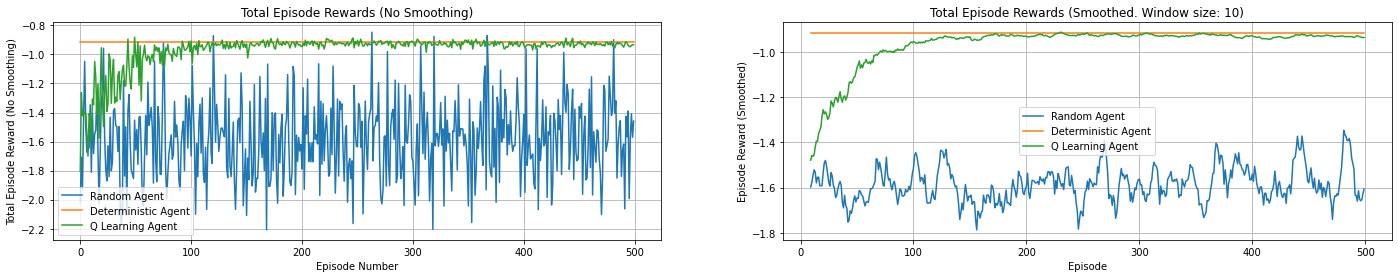

In [ ]:
sumRandRews   = [np.sum(rews) for rews in randTrainRews]
sumDetRews    = [np.sum(rews) for rews in detTrainRews]
sumQTrainRews = [np.sum(rews) for rews in QTrainRews]

plotEpisodeRews([sumRandRews, sumDetRews, sumQTrainRews], 10)

### Episode Rewards and Agent Convergence
The above plot shows the total episode rewards over training for all agents. The left subplot shows the raw rewards and the right subplot shows the same rewards "smoothed" using a rolling average over a defined window size in the function call above.

The first thing to note is the erratic behaviour of the random agent. This is to be expected due to the fact that the agent randomly selects actions with no influence from the current state or the potential rewards. We can see that the performance is almost always worse than both the Q-agent and the deterministic agent. This is expected, again due to the random nature of the agent and its inability to maximise the rewards it receives. This inability to maximise rewards is also the reason that this agent will never converge to a reasonable policy, the defined policy is to take actions randomly and the agent may not take measures to improve this policy.

The deterministic agent above can be viewed as exhibiting "opposite" behaviour to the random agent in that it has "converged" to a solution starting from the first episode. I believe that it is not appropriate to say that this agent has converged, however, due to the fact that the agent has no ability to update the policy it employs and cannot improve its rewards in any way. We can see that the agent will gain the exact same rewards in every episode, and this behaviour is to be expected due to the definition of a deterministic agent and a deterministic environment. The agent has been implemented with a pre-defined policy, and therefore will carry out the same actions in each episode. The behaviour of this agent may change drastically in a noisy or stochastic environment due to the fact that the states will change at random and the agent may employ the actions in its policy differently.

The Q-agent can be observed as exhibiting behaviour similar to both the random and deterministic agents. The agent will explore the environment in that it will take potentially sub-optimal actions based on a decaying exploration factor. This means that early on in training the agent will display behaviour similar to that of the random agent. Later on in training the Q-agent's rewards gradually increase over each episode. After the exploration factor has decayed to a point where the agent will rarely take sub-optimal actions at random, the agent will employ what it has "learned" from exploring the environment in order to gradually improve what it regards as the optimal policy. This is the phase of training where the agent exploits rather than exlpores as discussed in section 2.3.5. During this stage of training, the Q-values are gradually altered in order to match the TD targets calculated using the Bellman equation discussed in section 2.3.2. Eventually the agent will converge to a solution when there is little room for improvements to be made to the policy. At this point the rewards gained by the agent can be seen as "flattening" in the above graph. Here the agent shows behaviour similar to that of the deterministic agent, in that a potentially optimal policy has been discovered and it will be employed during each further episode.

In [ ]:
randStates, randRews, randActions = randomAgent.run(problemID, 
                                              stochastic = False, noisy = False)

In [ ]:
detStates, detRews, detActions = detAgent.run(problemID,
                                              stochastic = False, noisy = False)

In [ ]:
#Run the QAgent on the problem ID in a deterministic environment with no noise
QStates, QRews, QActions = QAgent.run(problemID)

Random total reward: -1.9195861770485922
Deterministic total reward: -0.9152755874423862
Q Learning total reward: -0.9317618874338853


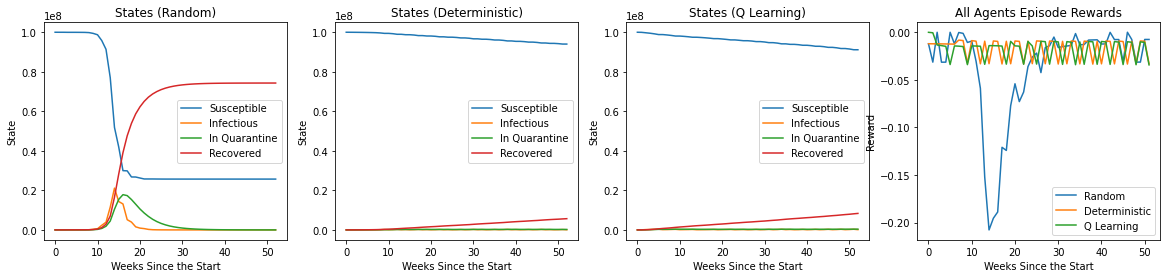

In [ ]:
plotStateRewardMulti([randStates, detStates, QStates], [randRews, detRews, QRews])

### Agent Rewards After Training

The above graphs show the evolution of the states seen by each agent, followed by the rewards over a single identical episode. We are able to draw conclusions by comparing the two graphs, for example we can compare dramatic changes in rewards with the state evolution of a particular agent.

The random agent's rewards are overall much lower than the other agents. This is expected due to the previously discussed random nature of the agent, and this random policy seems far from optimal. Any seemingly good performance by the random agent is based on sheer "luck" in the agent randomly finding a suitable action sequence.

The deterministic and Q agents perform similarly, with the Q-agent receiving a lower reward but in turn there are more recovered individuals. The weekly rewards show that both agents behave similarly and either may be employed in order to carry out an appropriate mitigation strategy. In the context of a pandemic, the choice of policy desirable may influence agent selection, for example while the rewards gained by the Q-agent are lower than the deterministic agent, there are more recovered individuals over the space of one episode. This agent's policy could be selected if this is the desred outcome, although a deterministic environment does not accurately represent the real world.

## 3.3 Determinitic ViRL problem with observational noise

In this section, each agents is trained and assessed on a deterministic version of the environment with observational noise. In this version of the simulation, the environment remains deterministic, however the state observations made by each agent will be subject to additional noise in the environment. This will not affect the actions of the random agent, but may effect the performance of both the deterministic and Q agents.



In [ ]:
randTrainStates, randTrainRews = [], []

#Collect "training" data for random agent (Used for comparisons)
for i in range(numEpisodes):
    randTrainState, randTrainRew, _ = randomAgent.run(problemID, noisy = True)
    randTrainStates.append(randTrainState)
    randTrainRews.append(randTrainRew)

In [ ]:
detTrainStates, detTrainRews = [], []

#Collect "training" data for deterministic agent (Used for comparisons)
for i in range(numEpisodes):
    detTrainState, detTrainRew, _ = detAgent.run(problemID, noisy = True)
    detTrainStates.append(detTrainState)
    detTrainRews.append(detTrainRew)

In [ ]:
#Train the QAgent, extract all states and rewards seen in each episode

QAgent.eps = 0.8    #Reset epsilon

QTrainState, QTrainRews = QAgent.train(
    problemID,                  #Use chosen problem ID
    stochastic  = False,        #Not a stochastic environment
    noisy       = True,        #No Noise either
    numEpisodes = numEpisodes,  #Train over num episodes
)

#Run this cell to train the QAgent over 250 episodes. This cell may take a long
#time to run. The train function will only print a reward if it is better than
#the best reward seen so far. Convergence can be observed in the below graphs.

Episode: 0/500, score: -1.7013635920764119, epsilon: 0.77
Episode: 2/500, score: -1.5089171943489041, epsilon: 0.71
Episode: 3/500, score: -1.291813699005374, epsilon: 0.68
Episode: 12/500, score: -1.2037887872011959, epsilon: 0.47
Episode: 56/500, score: -0.9901926101608537, epsilon: 0.075
Episode: 72/500, score: -0.9838605835580472, epsilon: 0.038
Episode: 73/500, score: -0.9375024419185248, epsilon: 0.037


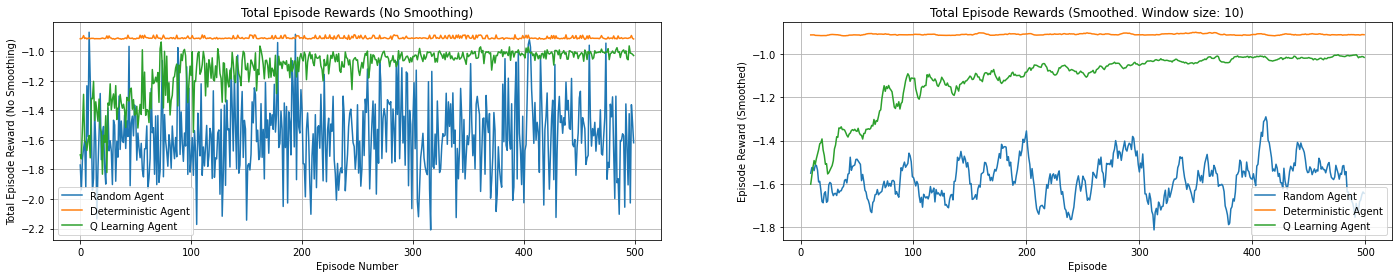

In [ ]:
sumRandRews   = [np.sum(rews) for rews in randTrainRews]
sumDetRews    = [np.sum(rews) for rews in detTrainRews]
sumQTrainRews = [np.sum(rews) for rews in QTrainRews]

plotEpisodeRews([sumRandRews, sumDetRews, sumQTrainRews], 10)

### Episode Rewards and Agent Convergence

Here we see the total episode rewards over training each agent in a noisy environment. Again, the left subplot shows the raw rewards and the right smoothed using a rolling average

The behaviour of the random agent is similar to in the deterministic environment. There is not much to be said about this agent's performance.

A notable difference is that the deterministic agent no longer produces the same rewards over each episode. This minute difference is observable in the above graph and demonstrates that the agent may implement the predefined policy differently given the noise in the observed states. While there is some slight variation in the agent's performance, its overall performance does not vary dramatically and it remains the highest scoring policy implemented by any of the agents.

The Q-agent's behaviour is similar to in the deterministic environment and its exploration factor behaves in the same way. A much slower gradual increase in episode rewards is observable in a noisy environment which indicates slow convergence. This slow convergence may be attributed to the observational noise of the environment. Here the agent is not able to refine its optimal policy as effectively as in the deterministic environment due to the lack of observing identical states over episodes. This leads to the agent optimising the policy for many different similar states rather than the expected deterministic state. Overall the agent appears to converge to a similar solution to the previous environment. It is worth noting that with greater influence from observational noise the agent may not converge to a suitable solution in the same number of training eipsodes.

In [ ]:
def setSeed(n):
    """
     * Given an integer, n, sets the random seed to n
    """
    random.seed(n)
    np.random.seed(n)

In [ ]:
setSeed(1000)

In [ ]:
randStatesNoise, randRewsNoise, randActionsNoise = randomAgent.run(problemID, stochastic = False, noisy = True)

In [ ]:
detStatesNoise, detRewsNoise, detActionsNoise    = detAgent.run(problemID, stochastic = False, noisy = True)

In [ ]:
QStatesNoise, QRewsNoise, QActionsNoise = QAgent.run(problemID, stochastic = False, noisy = True)

In [ ]:
seeds = [1000, 15, 73, 51, 4, 555]

avgRandRewsNoise = np.zeros((52))  #Stores the average of rewards over all seeds
avgDetRewsNoise  = np.zeros((52))
avgQRewsNoise    = np.zeros((52))

for i, seed in enumerate(seeds):
    setSeed(seed)

    currentStats = randomAgent.run(problemID, stochastic = False, noisy = True)
    avgRandRewsNoise += np.array(currentStats[1])

    currentStats = detAgent.run(problemID, stochastic = False, noisy = True)
    avgDetRewsNoise += np.array(currentStats[1])

    currentStats = QAgent.run(problemID, stochastic = False, noisy = True)
    avgQRewsNoise += np.array(currentStats[1])

avgRandRewsNoise /= 6
avgDetRewsNoise /= 6
avgQRewsNoise /= 6

Random total reward: -1.4728508700545773
Deterministic total reward: -0.9146246697921029
Q Learning total reward: -0.9601152308500995


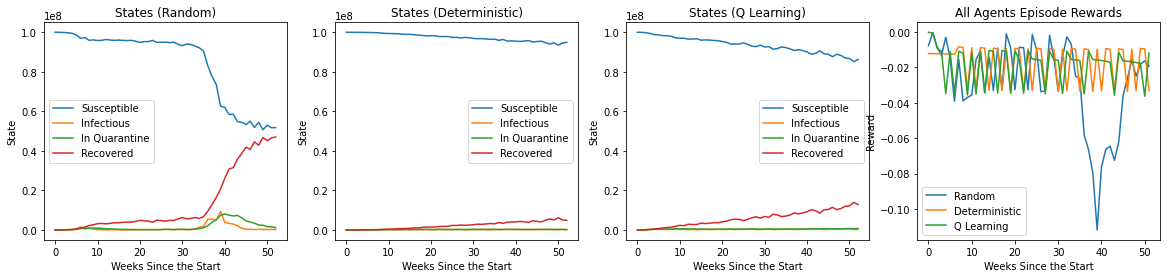

Random total reward: -1.6323576194029439
Deterministic total reward: -0.9107176441156131
Q Learning total reward: -0.9575481767049157


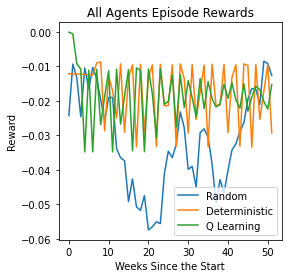

In [ ]:
plotStateRewardMulti([randStatesNoise, detStatesNoise, QStatesNoise], [randRewsNoise, detRewsNoise, QRewsNoise])
plotRews([avgRandRewsNoise, avgDetRewsNoise, avgQRewsNoise])

### Agent Rewards After Training

Here we see the state evolution graphs and corresponding agent rewards, and the bottom graph shows average rewards over 6 different episodes. Here the random agent's performance is expected to be worse than other agents, and its actions are not affected by the noise.

Again we see similar performance from both the deterministic and Q- agents as in the deterministic environment. The total episode rewards of both agents only slightly differs from without observational noise. This is an expected change, as the agents may behave slightly differently based on the states they observe with noise. Overall the difference in the environment does not pose much of a risk to the agent's abilities to implement a suitable policy. With a greater impact of observational noise, the agent's may be unable to implement such an effective policy. In the lower graph we see that an average reward over several episodes proves that the policies implemented by both agents are similar.

The same justifications for agent selection in the deterministic environment are applicable here, in that the desired state evolution may be selected, with Q-learning providing more recovered individuals in the same length of time.

## 3.4 Stochastic ViRL problem with observational noise

Finally each agent will be trained and run in a stochastic environment. This environment more accurately simulates a real-world setting in which unknown factors of the disease have a great impact on states the agent is able to view.

In [ ]:
randTrainStates, randTrainRews = [], []

#Collect "training" data for random agent (Used for comparisons)
for i in range(numEpisodes):
    randTrainState, randTrainRew, _ = randomAgent.run(problemID, stochastic = True, noisy = True)
    randTrainStates.append(randTrainState)
    randTrainRews.append(randTrainRew)

In [ ]:
detTrainStates, detTrainRews = [], []

#Collect "training" data for deterministic agent (Used for comparisons)
for i in range(numEpisodes):
    detTrainState, detTrainRew, _ = detAgent.run(problemID, stochastic = True, noisy = True)
    detTrainStates.append(detTrainState)
    detTrainRews.append(detTrainRew)

In [ ]:
#Train the QAgent, extract all states and rewards seen in each episode

QAgent.eps = 0.8    #Reset epsilon

QTrainState, QTrainRews = QAgent.train(
    problemID,                  #Use chosen problem ID
    stochastic  = True,        #Not a stochastic environment
    noisy       = True,        #No Noise either
    numEpisodes = numEpisodes,  #Train over num episodes
)

#Run this cell to train the QAgent over 250 episodes. This cell may take a long
#time to run. The train function will only print a reward if it is better than
#the best reward seen so far. Convergence can be observed in the below graphs.

Episode: 2/500, score: -1.5569950719921541, epsilon: 0.71
Episode: 6/500, score: -0.7001608715767293, epsilon: 0.6
Episode: 21/500, score: -0.2186821411898155, epsilon: 0.32
Episode: 178/500, score: -0.17895804030191947, epsilon: 0.001


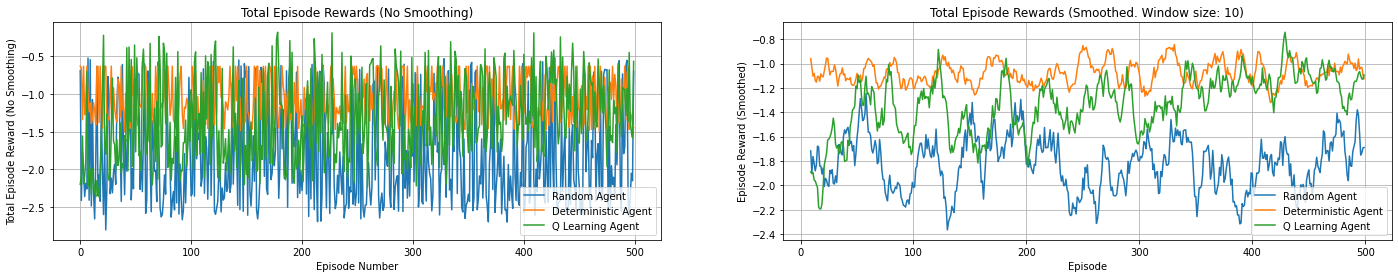

In [ ]:
sumRandRews   = [np.sum(rews) for rews in randTrainRews]
sumDetRews    = [np.sum(rews) for rews in detTrainRews]
sumQTrainRews = [np.sum(rews) for rews in QTrainRews]

plotEpisodeRews([sumRandRews, sumDetRews, sumQTrainRews], 10)

### Episode Rewards and Agent Convergence

In this environment, it appears that the raw rewards are incredibly erratic and do not provide much useful information about performance. The smoothed rewards graph shows this erratic behaviour to a slightly lesser extent. We can see that the random agent is still the worst performing agent of the three.

We can also see that the deterministic agent is now behaving quite unpredictably in comparison to in the deterministic environment. This is due to the stochastic nature of the environment, which causes the agent to implement its predefined policy in an incredibly different manner to an environment in which all transitions lead to identical states. Towards the end of training it can be seen that the deterministic agent and Q-agent perform in a relatively similar manner (graph specific).

The Q-agent's behaviour is also very turbulent in this environment. There is no clear distinction between the agent's exploration and exploitation phases of training as with the previous two environments. It is also difficult to discern whether or not the agent has converged to a reasonable policy. It could be argued that the agent has reached unstable convergence due to it performing similarly to the deterministic agent towards the end of training (graph specific), however it is not clear if this is true. It is not likely the agent will reach stable convergence due to the stochastic nature of the environment, however increasing the amount of training episodes may aid in reducing the erratic behaviour.

In [ ]:
setSeed(1000)

In [ ]:
randStatesStoch, randRewsStoch, randActionsStoch = randomAgent.run(problemID, stochastic = True, noisy = True)

In [ ]:
detStatesStoch, detRewsStoch, detActionsStoch    = detAgent.run(problemID, stochastic = True, noisy = True)

In [ ]:
QStatesStoch, QRewsStoch, QActionsStoch          = QAgent.run(problemID, stochastic = True, noisy = True)

In [ ]:
seeds = [1000, 15, 73, 51, 4, 555]

avgRandRewsStoch = np.zeros((52))  #Stores the average of rewards over all seeds
avgDetRewsStoch  = np.zeros((52))
avgQRewsStoch    = np.zeros((52))

for i, seed in enumerate(seeds):
    setSeed(seed)

    currentStats = randomAgent.run(problemID, stochastic = True, noisy = True)
    avgRandRewsStoch += np.array(currentStats[1])

    currentStats = detAgent.run(problemID, stochastic = True, noisy = True)
    avgDetRewsStoch += np.array(currentStats[1])

    currentStats = QAgent.run(problemID, stochastic = True, noisy = True)
    avgQRewsStoch += np.array(currentStats[1])

avgRandRewsStoch /= 6
avgDetRewsStoch  /= 6
avgQRewsStoch    /= 6

Random total reward: -2.341358590995143
Deterministic total reward: -1.4147387966130227
Q Learning total reward: -1.3954850256193105


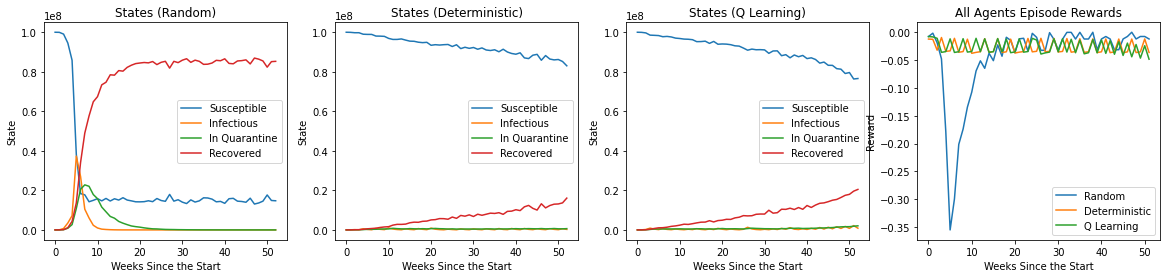

Random total reward: -2.4377769083846266
Deterministic total reward: -1.0866450784316388
Q Learning total reward: -1.4315622067449365


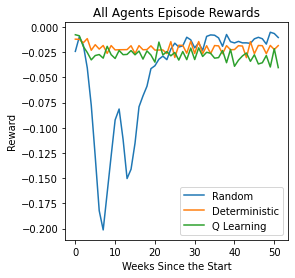

In [ ]:
plotStateRewardMulti([randStatesStoch, detStatesStoch, QStatesStoch], [randRewsStoch, detRewsStoch, QRewsStoch])
plotRews([avgRandRewsStoch, avgDetRewsStoch, avgQRewsStoch])

### Agent Rewards After Training

The random agent appears to show good performance after a dramatic dip and rise in rewards roughly up to episode 10. I believe this good performance is simply caused due to the large amount of recovereds as in in the state evolution graph, meaning that the agent's actions will almost always have a positive impact. The overall reward reflects this in showing that the agent's total rewards for the episode are still the worst of all three agents.

In the single identical episode, here the deterministic and Q-agent perform almost identically, as can be seen in the state evolutions of both, the rewards gained over the episode, and the total rewards. There may be several factors influencing this observation, for example the agent may have converged to a very similar policy as that employed by the deterministic agent. I believe that a more likely scenario is that the stochasticity of the environment has caused this convergence to a similar policy. This is supported by the average rewards graph shown below, we can see that on average the Q-agent performs worse than the deterministic agent, and the nature of the identical episode in the above graphs may have caused similar policies to be implemented by both agents.

It is difficult to determine which agent may perform better in a stochastic setting based on the above graphs alone. Initially it seems that both agents perform similarly, however on average it appears that the deterministic agent performs better. The agents have only been tested on a very small amount of stochastic environments and it is still uncertain as to whether or not the Q-agent has converged, so I believe that it is not possible to determine which agent is better suited to the task.

## 3.5 Improving generalization performance

A possible approach to improving performance in a stochastic environment is to employ a prioritised replay buffer. A prioritized replay buffer [9] behaves in a similar way to a replay buffer, however each entry is given a weighting based on some defined function that allows more important experiences to be sampled more frequently. The general goal of this weighting is to train the agent using experiences deemed more important than others in that the agent is able to learn more from them.

I believe that this approach to modifying the replay buffer would improve the performance of the agent in that it would provide more valuable learning opportunities throughout training. This would allow adjustments to the weights of the model's coefficients to more accurately approximate the TD targets and in turn improve performance.

# 4. Real-world reflection

***Could the optimal policies you developed in this work be used to inform decision making by politicians?***

I believe that in this specific simultaion it is not appropriate to employ this work to inform decision making. The environment used is relatively basic and does not consider external factors, such as impact on the global economy, caused by certain non-medical mitigation strategies.

The environment is not a very good model of the real world. It considers a space with a given amount of individuals, however there is no concept of different countries, their borders, politics, and the differing mitigation strategies they may employ, but only one space where one agent may implement a single weekly policy.

Another drawback of the environment is the week-by-week nature of the environment. In reality, approaches to mitigation are carried out where necessary, perhaps changed daily, and the environment does not reflect this in its incredibly structured, week-by-week operation.

One final drawback is the inability to implement multiple mitigation strategies. Realistically, several strategies could be in place at once, for example track and trace at the same time as social distancing and face masks. The environment does not allow the exploration of such situations, and only contributes to the argument that this environment does not represent a real-world situation.

# 5. Discussion

This coursework has provided me with valuable experience in implementing a Q-learning agent and the ability to adapt such an agent through the use of modifications such as replay buffer learning [2]. I have also found it incredibly valuable to tune the parameters of the agent in order to monitor performance changes and compare the Q-learning agent to two other agents.

There are several limitations to the implemented approach. For example the replay buffer is very basic and there was not enough time to implement a prioritized replay buffer [9] and monitor performance. Another limitation may be the agent implemenation itself. The agent is implemented using an RBF function approximation instead of a neural network which may perform either faster and more efficiently, or be able to discover a better optimal policy once converged. One final limitation to consider is the exploration of the agent. I believe that there are possibly better ways to decay the exploration factor of the agent such that there is either more time for it to explore the environment, or more opportunity later on in training to explore other possible policies.

Overall these are a few of the improvements I would have liked to implement given more time.


# ===EOF===

> This is a flag to tell the word counter to stop counting, anything in and below this cell will not be counted towards your report word count.
>
> Please do change this cell, any word below EOF does not count toward your report word count. Also please do not try to be snicky about the word counter; embrace the constraints we give you rather than fight them.

# References
[1] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[2] TensorFlow, (NA), "Replay Buffers", Retrieved from: https://www.tensorflow.org/agents/tutorials/5_replay_buffers_tutorial

[3] Joseph Rocca, (2019), "Introduction to Markov chains", Retrieved from: https://towardsdatascience.com/brief-introduction-to-markov-chains-2c8cab9c98ab

[4] "blackburn", (2019), "Reinforcement Learning : Markov-Decision Process (Part 1)", Retrieved from: https://towardsdatascience.com/introduction-to-reinforcement-learning-markov-decision-process-44c533ebf8da

[5] Sebastian Stein, (2020), "ViRL", Retrieved from: https://git.dcs.gla.ac.uk/SebastianStein/virl

[6] Jordi Torres, (2020), "The Bellman Equation", Retrieved from: https://towardsdatascience.com/the-bellman-equation-59258a0d3fa7

[7] Sklearn, (NA), "Stochastic Gradient Descent", Retrieved from: https://scikit-learn.org/stable/modules/sgd.html#sgd

[8] Python, (NA), "collections - Container Datatypes", Retrieved from: https://docs.python.org/3/library/collections.html#collections.deque

[9] Tom Schaul, John Quan, Ioannis Antonoglou and David Silver, (2016), "Prioritized Experience Replay", Retrieved from: https://arxiv.org/pdf/1511.05952.pdf


# Appendices

> You can add as much supplementray information below. It will not be counted towards the word limit but you should not expect the marker to read this section for marking.

# Exporting your report

> To simplify your life, we made an automatic script below to create your submission file.
>
> If you provide your student number and the sharing url for you colab notebook below, the last cell will do the following:
1. Generate a folder to save your report
2. Export this notebook as a .ipynb file
3. Convert and save this notebook as a static html page
4. Convert and save this notebook as a standalone pdf file
5. Create a html file that automatically redirect to your notebook sharing url
6. Create a .zip file with all these files
7. Downloading the .zip file to your default download folder
>
>You just have to check the result is good for you and submit the .zip file on Moodle before the deadline. Couldn't be any easier right?





> **Please make sure your word count is around 5000 and you have not more than 10 figures before submtting your report. You are expected to remove all instruction text given in this template (above the EOF section) from your final report so it is not counted toward your final world count.**

## Add information about you and your Colab notebook sharing URL

>First add your student number in the `YOUR_STUDENT_NUMBER` variable below.
>
>Then generate a sharing URL for this notebook. See https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm and choose "Anyone with the link option".
>
>Finally, add your Colab sharing URL in the `SHARING_URL_FOR_THIS_COLAB` variable below.

In [ ]:
YOUR_STUDENT_NUMBER = "2407682H"

# get a sharable link and copy it below
# See https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm
# and choose "Anyone with the link option"
SHARING_URL_FOR_THIS_COLAB = "https://colab.research.google.com/drive/1kKLx-ux2bzqLzNbR9ubChQgNExxsNb_f?usp=sharing"

> **If you are confused at this stage, watch the step-by-step video below**

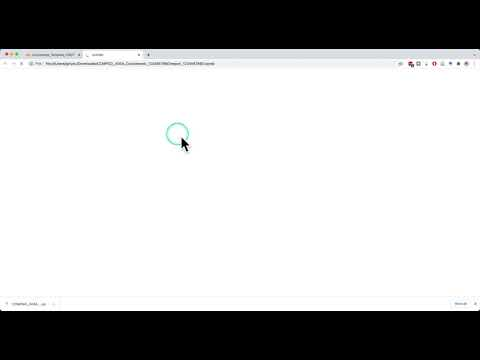

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('JlcJ8FeEvvI', width=1120, height=630)

## Generate and export your files

> Well done! Now run the cell below and it will generate all the files you need for your submission

In [ ]:
# Exporting your submission files

###########################################
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Please do not change this code cell in any way
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###########################################

# checking you did read the above cell and added your information
# again please be smart and add your information above rather than modifying the code below
STUDENT_CHANGED_DEFAULT_VALUES = True

# checking you entered a student number
if YOUR_STUDENT_NUMBER == "REPLACE_WITH_YOUR_STUDENT_NUMBER":
  STUDENT_CHANGED_DEFAULT_VALUES = False
  print("###########################################")
  print("")
  print("Please add your student number in the YOUR_STUDENT_NUMBER variable in the code cell above!")
  print("")
  print("###########################################")

# checking you entered a URL that works
if SHARING_URL_FOR_THIS_COLAB == "REPLACE_WITH_YOUR_SHARING_URL_FOR_THIS_COLAB" :
  STUDENT_CHANGED_DEFAULT_VALUES = False
  print("###########################################")
  print("")
  print("Please add your Colab sharing URL number in the `SHARING_URL_FOR_THIS_COLAB` variable in the code cell above!")
  print("")
  print("###########################################")

if not STUDENT_CHANGED_DEFAULT_VALUES:
  raise ValueError('You have not added you student number and/or shared the sharing URL for your Colab notebook. \n Please read the above cells carefully.')


# define some folder and file names
import os 
report_foldername = "COMPSCI_4004_Coursework_{}".format(YOUR_STUDENT_NUMBER)
report_folderpath = os.path.join("/content", report_foldername)
ipynb_filename = os.path.join(report_folderpath, "report_{}.ipynb".format(YOUR_STUDENT_NUMBER))
html_redirect_filename = os.path.join(report_folderpath, "colab_link_{}.html".format(YOUR_STUDENT_NUMBER))
report_zip_filename = os.path.join(report_folderpath, "{}.zip".format(report_foldername))

# create folder if it does not exist
if not os.path.exists(report_folderpath):
  print("Creating {} folder...".format(report_folderpath))
  os.mkdir(report_folderpath)

# Obtain the notebook JSON as a string
print("Saving notebook as {}...".format(ipynb_filename))

from google.colab import _message
notebook_json = _message.blocking_request('get_ipynb', request='', timeout_sec=5)

# save ipynb part into a file locally
import json
with open(ipynb_filename, 'w') as f:
    f.write(json.dumps(notebook_json["ipynb"]))
    
# export to html
print("Exporting notebook as html file...")
os.system("jupyter nbconvert --to html {}".format(ipynb_filename))

#export to pdf
print("Exporting notebook as pdf file...")
## make sure xetex is installed
print("Installing required librarie, this might take a while, be patient...")
!apt-get -qq install texlive-xetex texlive-fonts-recommended texlive-generic-recommended > /dev/null
## export to pdf
os.system("jupyter nbconvert --to pdf {}".format(ipynb_filename))

# paste the url for this colab in a html file redirecting to it
print("Creating html redirecting file to your Colab...")

html_redirect_content = """
<!DOCTYPE HTML>
<html lang="en-US">
    <head>
        <meta charset="UTF-8">
        <meta http-equiv="refresh" content="0; url={colab_link}">
        <script type="text/javascript">
            window.location.href = "{colab_link}"
        </script>
        <title>Page Redirection</title>
    </head>
    <body>
        <!-- Note: don't tell people to `click` the link, just tell them that it is a link. -->
        If you are not redirected automatically, follow <a href='{colab_link}'>{colab_link}</a>.
    </body>
</html>
""".format(colab_link=SHARING_URL_FOR_THIS_COLAB)

with open(html_redirect_filename, 'w') as f:
    f.write(html_redirect_content)

# # zip the folder with all results
print("Making a zip file of the all thing...")
os.system("cd {}; zip -r {} *".format(report_folderpath, report_zip_filename))

# download the zip folder for submission
print("Downloading the zip file to your computer...")

from google.colab import files
files.download(report_zip_filename)

#
print("")
print("All done! Check and submit the downloaded zip file")

Creating /content/COMPSCI_4004_Coursework_2407682H folder...
Saving notebook as /content/COMPSCI_4004_Coursework_2407682H/report_2407682H.ipynb...
Exporting notebook as html file...
Exporting notebook as pdf file...
Installing required librarie, this might take a while, be patient...
Extracting templates from packages: 100%
Creating html redirecting file to your Colab...
Making a zip file of the all thing...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All done! Check and submit the downloaded zip file
